Looking into https://github.com/ME-ICA/tedana/issues/556

In [1]:
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

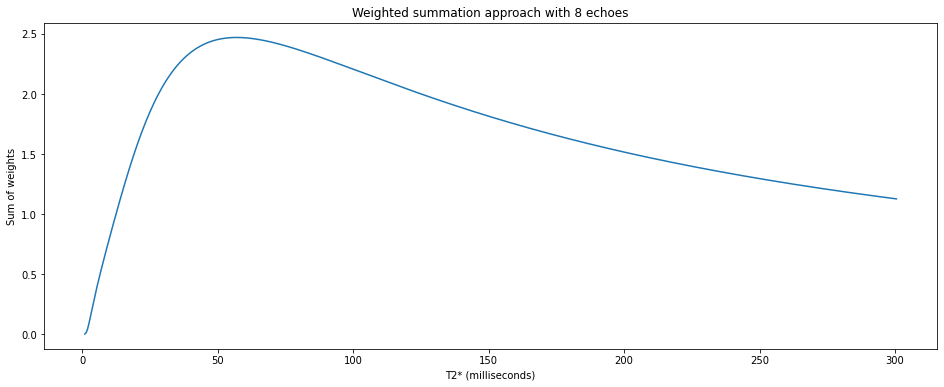

In [2]:
tes = np.array([9.58, 21.95, 34.32, 46.69, 59.06, 71.43, 83.8, 96.17])
tes = tes[:, None]
t2s = np.arange(1, 301, 0.5)[None, :]

alpha = tes * np.exp(-tes / t2s)
alpha2 = (tes / t2s) * np.exp(-tes / t2s)
total_weight = np.sum(alpha2, axis=0)
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(np.squeeze(t2s), total_weight)
ax.set_ylabel('Sum of weights')
ax.set_xlabel('T2* (milliseconds)')
ax.set_title('Weighted summation approach with 8 echoes')
fig.savefig('example.png')

In [3]:
# Where's the max in the curve? Is it somewhere that makes sense?
t2s[0, np.where(total_weight == np.max(total_weight))[0][0]]

57.0

In [4]:
# It's not the mean echo time
np.mean(tes)

52.875

In [5]:
# Normalized versions of weights in tedana and weights from Posse are the same
print(alpha[:, 10] / np.sum(alpha[:, 10]))
print(alpha2[:, 10] / np.sum(alpha2[:, 10]))

[7.34489660e-01 2.14133317e-01 4.26016620e-02 7.37450171e-03
 1.18694827e-03 1.82662141e-04 2.72672572e-05 3.98168221e-06]
[7.34489660e-01 2.14133317e-01 4.26016620e-02 7.37450171e-03
 1.18694827e-03 1.82662141e-04 2.72672572e-05 3.98168221e-06]


In [6]:
# These values are guesstimated from https://github.com/ME-ICA/tedana/issues/93#issuecomment-437687531
# But the results should be valid.
tes = np.array([15.4, 29.7, 44.0, 58.3, 72.6])
vals = np.array([27000, 20000, 15500, 12500, 8000])
t2s = 48.5

<ipython-input-7-7eb8c3e06d56>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


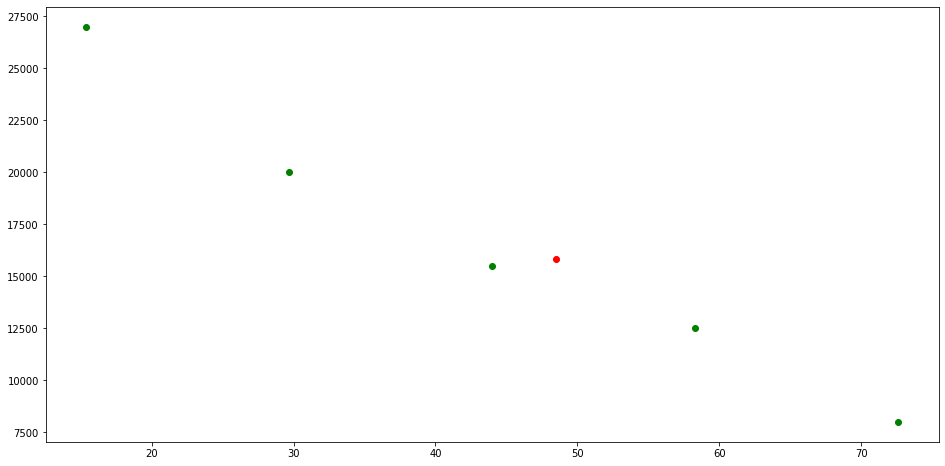

In [7]:
# Just show weighted average
# Note that it clearly doesn't fall on the curve.
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(tes, vals, color='green')
alpha = tes * np.exp(-tes / t2s)
comb_avg = np.average(vals, weights=alpha)
comb_sum = np.dot(vals, alpha)
ax.scatter(t2s, comb_avg, color='red')
fig.show()

<ipython-input-8-7d684523e8d8>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


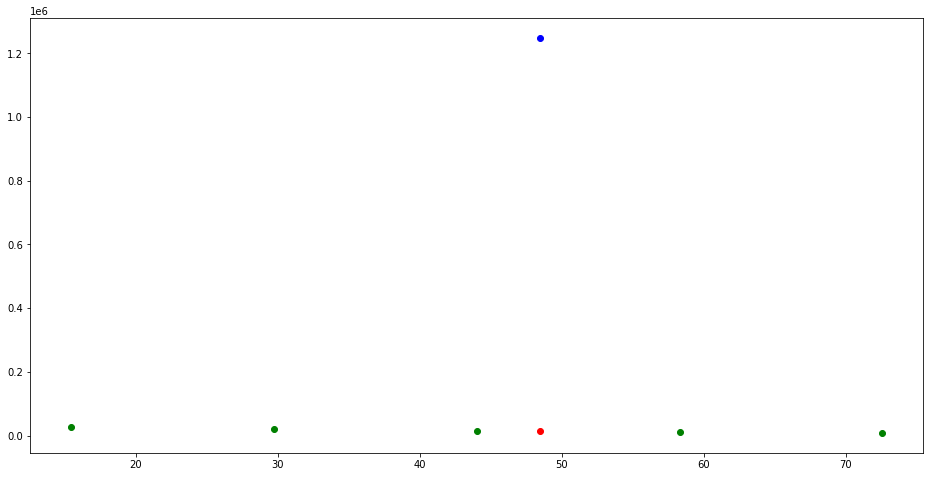

In [8]:
# Now show with weighted sum too.
# Note that it's far worse than the weighted average.
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(tes, vals, color='green')
alpha = tes * np.exp(-tes / t2s)
comb_avg = np.average(vals, weights=alpha)
comb_sum = np.sum(vals * alpha)
ax.scatter(t2s, comb_avg, color='red')
ax.scatter(t2s, comb_sum, color='blue')
fig.show()